In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.read_csv('WMT_FB_BP_2014_2017.csv', index_col='Date')

In [5]:
pf_data.head()

,WMT,FB,BP
Date,,,
2013-12-31,70.753525,54.650002,37.758350
2014-01-02,70.951355,54.709999,37.268997
2014-01-03,70.717583,54.560001,37.183540
2014-01-06,70.321945,57.200001,37.284527
2014-01-07,70.537735,57.919998,37.711742


In [6]:
pf_data.tail()

,WMT,FB,BP
Date,,,
2017-12-06,96.769997,176.059998,39.580002
2017-12-07,96.779999,180.139999,39.310001
2017-12-08,96.550003,179.000000,39.639999
2017-12-11,96.930000,179.039993,39.930000
2017-12-12,96.699997,176.960007,40.660000


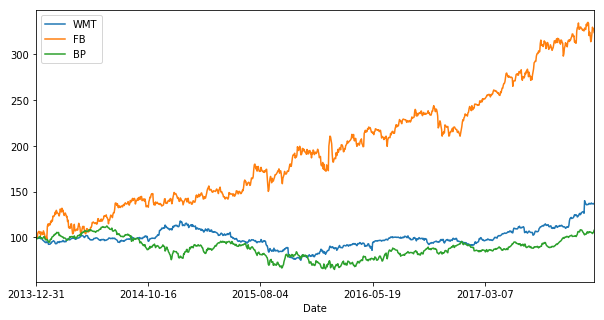

In [12]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

WMT    0.078495
FB     0.295220
BP     0.018603
dtype: float64

In [8]:
log_returns.cov() * 250

,WMT,FB,BP
WMT,0.032659,0.007449,0.005651
FB,0.007449,0.074427,0.013889
BP,0.005651,0.013889,0.056863


In [9]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.151081,0.131138
FB,0.151081,1.000000,0.213505
BP,0.131138,0.213505,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

3

In [12]:
arr = np.random.random(2)
arr

array([ 0.71129498,  0.47156867])

In [13]:
arr[0] + arr[1]

1.1828636493966584

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.31321904,  0.53488   ,  0.15190096])

In [15]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.18531907252762322

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.031099925953741527

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.1763517109464536

***

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.24989988,  0.22773183,  0.0643395 ,  0.06937222,  0.18505165,
         0.20423739,  0.10283063,  0.08738578,  0.05117993,  0.12241083,
         0.11190829,  0.08377243,  0.12715164,  0.08559494,  0.12049628,
         0.16729744,  0.1284473 ,  0.09517607,  0.08015956,  0.13479341,
         0.16735131,  0.27018563,  0.14146612,  0.14163287,  0.06538892,
         0.09448284,  0.19151443,  0.12970324,  0.16174978,  0.27264495,
         0.15855912,  0.13156203,  0.05827612,  0.12426254,  0.19736153,
         0.12416003,  0.05594182,  0.14207482,  0.18278401,  0.09775954,
         0.14550223,  0.14649359,  0.22961785,  0.07089217,  0.08753737,
         0.13300314,  0.14068466,  0.1054017 ,  0.17699139,  0.19293895,
         0.1256007 ,  0.13900458,  0.15279519,  0.13954602,  0.22793696,
         0.11003132,  0.15437282,  0.13647588,  0.16831346,  0.14132411,
         0.25278496,  0.17258023,  0.12675851,  0.12426066,  0.08278206,
         0.17291628,  0.07340288,  0.15524805,  0.1

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.249900,0.231816
1,0.227732,0.224606
2,0.064339,0.181580
3,0.069372,0.178144
4,0.185052,0.173163


In [23]:
portfolios.tail()

,Return,Volatility
995,0.116302,0.192437
996,0.149601,0.188844
997,0.097322,0.144981
998,0.147365,0.159051
999,0.053384,0.202109


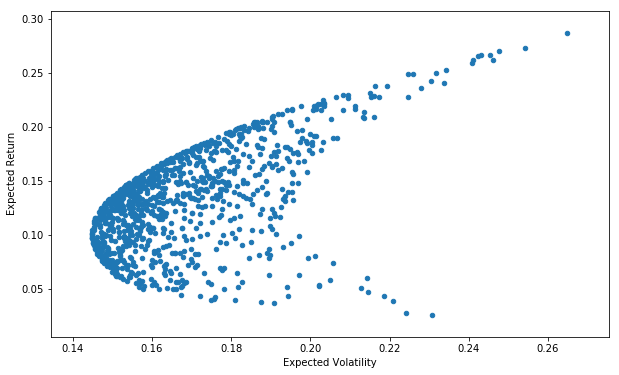

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')